In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight ="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

/var/folders/cm/t16gz6kd6mvdqrhqvcg9f1fh0000gn/T/ipykernel_3605/185427272.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [4]:
def score_dataset(X,y,model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
         X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error"
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

# Prepare data 
df = pd.read_csv('ames.csv')

In [5]:
X  = df.copy()
y = X.pop("SalePrice")

features = ["LotArea",
            "TotalBsmtSF",
            "FirstFlrSF",
            "SecondFlrSF",
            "GrLivArea"
            ]
# Standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

# Fit the Kmeans model to X_scaled and create the cluster label
kmeans = KMeans(n_clusters=10,n_init=10,random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)

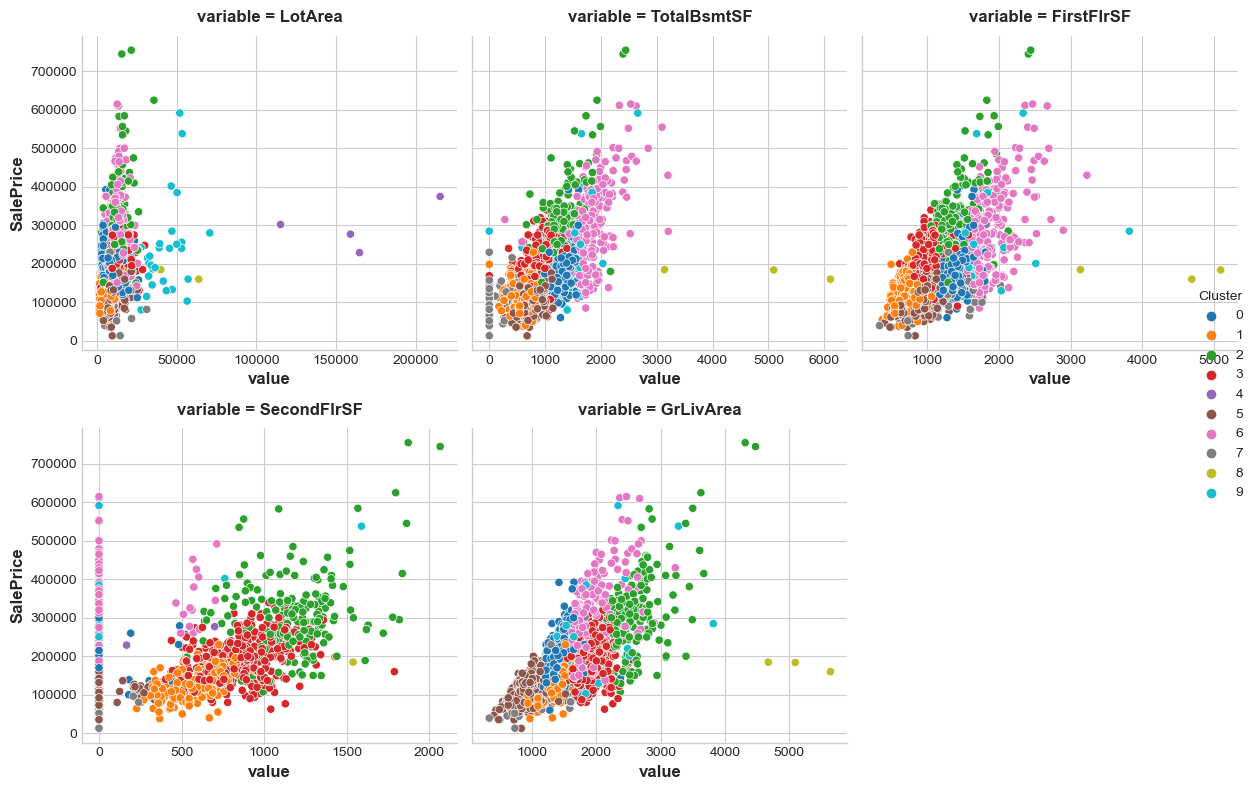

In [6]:
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
);

In [7]:
score_dataset(X,y)

0.1404632128875517

In [8]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)

# Create the cluster-distance features using 'fit_transform'
X_cd = kmeans.fit_transform(X_scaled)

# Label features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = X.join(X_cd)

In [9]:
score_dataset(X,y)

0.1414333744272644